In [1]:
import quandl
quandl.ApiConfig.api_key = "d74vRZ6prcs1hPREziKz"
import numpy as np
import pandas as pd

In [2]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE', 'TSLA', 'XOM'], date={'gte':'2017-01-01', 'lte':'2018-12-31'}, paginate=True)

In [3]:
prices.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
0,XOM,2018-12-31,68.32,69.145,67.66,68.19,15609337.0,0.0,68.19,2018-12-31
1,XOM,2018-12-28,69.18,69.580,67.82,68.17,19617793.0,0.0,68.17,2018-12-28
2,XOM,2018-12-27,67.74,68.940,66.08,68.94,21315318.0,0.0,68.94,2018-12-27
3,XOM,2018-12-26,66.18,68.655,64.65,68.64,24403048.0,0.0,68.64,2018-12-26
4,XOM,2018-12-24,66.87,67.530,65.44,65.51,14262074.0,0.0,65.51,2018-12-28


In [4]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')

In [5]:
pivoted.head()

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2017-01-03,116.15,41.80,51.98,216.99,90.89
2017-01-04,116.02,41.65,53.07,226.99,89.89
2017-01-05,116.61,41.75,53.06,226.75,88.55
2017-01-06,117.91,41.74,53.91,229.01,88.50
2017-01-09,118.99,41.32,53.38,231.28,87.04


In [6]:
aapl = pivoted['AAPL'].pct_change().apply(lambda x: np.log(1+x))
aapl.head()

date
2017-01-03         NaN
2017-01-04   -0.001120
2017-01-05    0.005072
2017-01-06    0.011087
2017-01-09    0.009118
Name: AAPL, dtype: float64

In [7]:
mean_aapl = aapl.sum()/aapl.count()
mean_aapl

0.0006109094785497567

In [8]:
sqd_aapl = aapl.apply(lambda x: (x-mean_aapl)**2)
sqd_aapl.head()

date
2017-01-03         NaN
2017-01-04    0.000003
2017-01-05    0.000020
2017-01-06    0.000110
2017-01-09    0.000072
Name: AAPL, dtype: float64

In [9]:
ssqd_aapl = sqd_aapl.sum()
ssqd_aapl

0.11329941775245922

In [10]:
var_aapl = ssqd_aapl/(aapl.count()-1)
var_aapl

0.00022659883550491843

In [11]:
aapl.var()

0.00022659883550491843

# Variance

$$s^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}$$

# Standard Deviation (Volatility)

$$s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}}$$

In [13]:
daily_sd = np.sqrt(var_aapl)
daily_sd

0.01505320017487705

In [14]:
annual_sd = daily_sd*np.sqrt(250)
annual_sd

0.23801199313528218

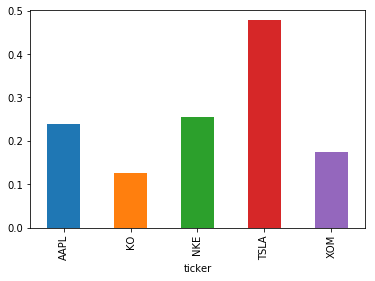

In [20]:
pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')